# Tarea 3 Inteligencia Artificial 2023-1

In [ ]:
!gdown 1ZV_nCUfuitYz0vpKFhg5wdwz_LlaVQVo
!unzip 'Avengers 1.zip'

In [ ]:
!pip install face_recognition

In [ ]:
import pandas as pd

#Clase que utilizaremos para un clasificador SVM
from sklearn.svm import SVC
#Clase que utilizaremos para un clasificador Bayesiano ingenuo
from sklearn.naive_bayes import GaussianNB
#Clase que utilizaremos para un clasificador de arbol de decision
from sklearn.tree import DecisionTreeClassifier

#Actividad 1 - Carga de datos y análisis

In [ ]:
from os import listdir
from os.path import join
import face_recognition as fr
root = "Avengers 1"
# Con este comando vemos todos los subdirectorios y archivos presentes en el directorio actual
lista_directorios = listdir(root)
# Con esto podemos obtener el nombre de la primera carpeta del directorio que corresponde a
# un nombre de un avenger, en este caso 'black_widow'
primera_carpeta = lista_directorios [0]
# Con esto tenemos la ruta donde se encuetran las fotos del primer Vengador
directorio_primer_avenger = join(root, primera_carpeta)
# Obtenemos una lista de los nombres de los archivos de las fotos presentes en la carpeta
lista_fotos_primer_avenger = listdir(directorio_primer_avenger)
primera_imagen = lista_fotos_primer_avenger [1]
ruta_imagen = join(directorio_primer_avenger , primera_imagen)
# Cargamos el archivo usando la libreria face_recognition
image = fr.load_image_file(ruta_imagen)
# Le calculamos los landmarks a la imagen del Vengador
face_landmarks_list = fr.face_landmarks(image)
print(f"Clase del Vengador: {primera_carpeta} \nLandmarks del primer Vengador: { face_landmarks_list}")

Los Landmarks son las ubicaciones y los contornos de los ojos, la nariz, la boca y la barbilla de la imagen dada.

Los Landmarks están guardados en una lista que contiene diccionarios, donde la llave de cada diccionario corresponde a una parte de la cara en específico, y los valores son una lista de tuplas de las coordenadas de la respectiva parte de la cara.

Ahora, definiré una función para mostrar de forma rápida una imágen de cada avenger junto a su etiqueta, vale decir, el nombre o clase de cada avenger.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def display_avenger_images(root, lista_directorios):
    for avenger in lista_directorios:
        directorio_avenger = os.path.join(root, avenger)
        lista_fotos_avenger = os.listdir(directorio_avenger)

        if lista_fotos_avenger:
            primera_imagen = lista_fotos_avenger[0]
            ruta_imagen = os.path.join(directorio_avenger, primera_imagen)

            image = Image.open(ruta_imagen)

            plt.figure()
            plt.imshow(image)
            plt.title(avenger)
            plt.axis('off')
            plt.show()

display_avenger_images(root, lista_directorios)

Ahora, veremos la distribución de los datos en el dataset. Definiremos una función que obtiene la cantidad de imagenes que hay de cada avenger en el dataset.

In [ ]:
def get_image_counts(root, lista_directorios):
    image_counts = {}
    for avenger in lista_directorios:
        directorio_avenger = os.path.join(root, avenger)
        lista_fotos_avenger = os.listdir(directorio_avenger)
        image_counts[avenger] = len(lista_fotos_avenger)
    return image_counts


image_counts = get_image_counts(root, lista_directorios)

total_counts = 0
for avenger, count in image_counts.items():
    print(f"{avenger}: {count}")
    total_counts += count

In [ ]:
print(f"Y la cantidad total de imágenes es: {total_counts}")

Podemos ver que para algunos avengers tenemos muchas más imágenes disponibles que para otros. Esto podría tener un efecto significativo en el rendimiento de un modelo de reconocimiento facial para cada avenger, siempre que solo se usen estos datos para entrenar.

A continuación, mostraré un gráfico con el que es posible apreciar el porcentaje de imágenes de cada avenger en relación a la cantidad total de imágenes.

In [ ]:
values = []
labels = []
for avenger, count in image_counts.items():
    values.append(count)
    labels.append(avenger)


wedge_properties = {"edgecolor":"k",'linewidth': 1}
plt.pie(values, labels=labels, startangle=30,
           counterclock=False, shadow=True, wedgeprops=wedge_properties,
           autopct="%1.2f%%", pctdistance=0.7)
plt.title("Distribucion de imagenes")

plt.show()

Podemos ver claramente que hay muy pocas imágenes de Nick Fury y Hawkeye, mientras que hay muchas de Iron Man.

#Actividad 2 - Pre-procesamiento de los datos

Primero, definimos una función que calcula los landmarks de cada imágen en un directorio, y los retorna en un diccionario donde las llaves son las imágenes y los valores son listas con los landmarks. En caso de que en una imágen no se pudo reconocer una cara, el valor es una lista vacía.

In [ ]:
# Función que calcula los landmarks de todas las imágenes de un directorio
def calculate_landmarks(directory):
    landmarks = {}
    image_files = os.listdir(directory)

    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        image = fr.load_image_file(image_path)
        face_landmarks_list = fr.face_landmarks(image)
        landmarks[image_file] = face_landmarks_list

    return landmarks

# Como ejemplo, calcularemos los landmarks de black widow
avenger_directory = os.path.join(root, "black_widow")
landmarks = calculate_landmarks(avenger_directory)
print(landmarks)

Ahora, definimos una función que toma como argumento un directorio de la misma forma que en la anterior, pero que ahora muestra una imágen random usando pyplot, para luego mostrar la misma imágen con los landmarks sobre ella.

In [ ]:
import random

def display_image_with_landmarks(directory, avenger):
    image_files = os.listdir(directory)
    random_image_file = random.choice(image_files)
    image_path = os.path.join(directory, random_image_file)

    image = fr.load_image_file(image_path)
    face_landmarks_list = fr.face_landmarks(image)

    # Mostrar foto sin landmarks
    plt.figure()
    plt.imshow(image)
    plt.title(f"Original {avenger} Image")
    plt.axis('off')
    plt.show()

    # Mostrar foto con landmarks encima
    plt.figure()
    plt.imshow(image)

    for face_landmarks in face_landmarks_list:
        for landmark_type, landmarks in face_landmarks.items():
            x_values = [point[0] for point in landmarks]
            y_values = [point[1] for point in landmarks]
            plt.scatter(x_values, y_values, color='red', marker='.')

    plt.title(f"{avenger} Image with Landmarks")
    plt.axis('off')
    plt.show()

Ahora vamos a mostrar una imágen random de cada avenger, junto con sus respectivos landmarks en caso de que sean válidos.

In [ ]:
for avenger in lista_directorios:
        directorio_avenger = os.path.join(root, avenger)
        lista_fotos_avenger = os.listdir(directorio_avenger)
        display_image_with_landmarks(directorio_avenger, avenger)

Ahora, vamos a calcular los Landmarks de todos los avengers

In [ ]:
landmarks_black_widow = landmarks # renombramos los landmarks de black widow que habiamos calculado

captain_directory = os.path.join(root, "captain_america")
landmarks_captain_america = calculate_landmarks(captain_directory)

ironman_directory = os.path.join(root, "iron_man")
landmarks_ironman = calculate_landmarks(ironman_directory)

hulk_directory = os.path.join(root, "hulk")
landmarks_hulk = calculate_landmarks(hulk_directory)

thor_directory = os.path.join(root, "thor")
landmarks_thor = calculate_landmarks(thor_directory)

hawkeye_directory = os.path.join(root, "hawkeye")
landmarks_hawkeye = calculate_landmarks(hawkeye_directory)

nickfury_directory = os.path.join(root, "nick_fury")
landmarks_nickfury = calculate_landmarks(nickfury_directory)

Definiremos una función que cuente la cantidad de imágenes sin landmarks para cada imágen, para estar al tanto de la cantidad de datos válidos que tenemos. Retorna una tupla de la siguiente forma:

(cantidad de imágenes sin landmarks, total de imágenes)

In [ ]:
def count_null_landmarks(landmarks_dict):
  empty_count = 0
  total_count = len(landmarks_dict)
  for key, value in landmarks_dict.items():
        if len(value) == 0:
            empty_count += 1

  return empty_count, total_count

In [ ]:
nickfury = count_null_landmarks(landmarks_nickfury)
hawkeye =  count_null_landmarks(landmarks_hawkeye)
thor = count_null_landmarks(landmarks_thor)
hulk = count_null_landmarks(landmarks_hulk)
ironman = count_null_landmarks(landmarks_ironman)
captain_america = count_null_landmarks(landmarks_captain_america)
black_widow = count_null_landmarks(landmarks_black_widow)

In [ ]:
# añadirlos todos a una lista
avengers_values = []
avengers_values.append(nickfury)
avengers_values.append(hawkeye)
avengers_values.append(thor)
avengers_values.append(hulk)
avengers_values.append(ironman)
avengers_values.append(captain_america)
avengers_values.append(black_widow)

print(avengers_values)

In [ ]:
names = ['Nick Fury', 'Hawkeye', 'Thor', 'Hulk', 'Ironman', 'Captain America', 'Black Widow']
pct_values = []
def print_invalid_values(avengers_values, names):
    index = 0
    for avenger in avengers_values:
        invalid_pct = (avenger[0] * 100) / avenger[1]
        name = names[index]
        print(f"{name} tiene {avenger[0]} imágenes sin landmarks, lo cual equivale a un {invalid_pct:.2f}%")
        index += 1
        values.append(invalid_pct)

print_invalid_values(avengers_values, names)

Podemos apreciar que todos los avengers tienen una cantidad similar de imágenes invalidas en relación al total de imágenes que hay, a excepción de Nick Fury, que tiene un 73.16% de imágenes inválidas, lo cual es un montón.

Para continuar con la tarea, eliminare las imágenes que no tienen landmarks. Esto debería perjudicar a los modelos que entrenaremos en cuanto a todos los avengers de una forma parecida, a excepción de Nick Fury, que definitivamente tendrá pocos datos, siendo muy probable que el modelo no sea muy preciso en el reconocimiento de este personaje.

Considero que rellenar los valores vacíos con un promedio por ejemplo, producirá mucho sesgo y/o ruido en las diferentes clases. También, descarto usar las imágenes sin landmarks para entrenar sabiendo que estas no tienen landmarks. Lo descarto porque es muy probable que se introduzca un sesgo frente a cierto tipo de imágenes similares, que pueden ser perfectamente de muchas clases distintas de avengers.

Es lamentable que tenga que descartar una cantidad considerable de datos, pero es la mejor opción dadas las circunstancias.

In [ ]:
# función para eliminar los datos deseados
def remove_empty_values(dictionary):
    return {key: value for key, value in dictionary.items() if value != []}

# actualizamos el valor de todos los landmarks
landmarks_nickfury = remove_empty_values(landmarks_nickfury)
landmarks_hawkeye = remove_empty_values(landmarks_hawkeye)
landmarks_thor = remove_empty_values(landmarks_thor)
landmarks_hulk = remove_empty_values(landmarks_hulk)
landmarks_ironman = remove_empty_values(landmarks_ironman)
landmarks_captain_america = remove_empty_values(landmarks_captain_america)
landmarks_black_widow = remove_empty_values(landmarks_black_widow)

#Actividad 3 - Definición de features

Para posteriormente entrenar a nuestros modelo, a partir de los landmarks obtenidos por **face-recognition**, calcularemos distancias de coordenadas para obtener las siguientes features:


1. **eye_nose_width**: La relación entre la separación de los ojos y el ancho de la nariz.
2. **eyebrow_distance**: La distancia entre los puntos más lejanos entre ambas cejas.
3. **mouth_width_place**: La proporción entre el posicionamiento de la boca en relación a la nariz / en el ancho de esta.
4. **eye_space**: La separación entre el borde interno de ambos ojos.
5. **nose_length**: El largo de la nariz, la diferencia entre el punto más alto y el punto más bajo.
6. **two_axis_proportion**: La proporción entre el eje vertical (la distancia del punto más alto de la cara hasta la boca) en relación al eje horizontal (la separación de los bordes externos de ambos ojos).
7. **eyebrow_height**: El promedio de la separación entre las cejas y sus respectivos ojos. Se calcularía sumando aquellas distancias y diviendo por 2.
8. **orbicular**: Proporción entre el comienzo  y la punta de la nariz, en relación al espacio orbicular: la distancia entre el comienzo de la nariz y la boca.
9. **sup_lip**: El tamaño del labio superior en relación al espacio orbicular de la cara.
10. **lips_relation**: La relación entre el tamaño del labio superior con el tamaño del labio inferior.

Todos estos valores de partes de la cara le permitirán al modelo clasificar a los diversos avengers en nuestro set de datos. Esto ya que son diversas medidas de la cara que pueden tener una alta varianza entre los datos que tenemos.
En la elección de varias features, me apoyé en el siguiente paper: https://www.researchgate.net/publication/220659985_Anthropometric_3D_Face_Recognition
En donde se muestran distintas proporciones de la cara humana, junto a la desviación de ests medidas según el experimento realizado por los investigadores. Tomé algunas que eran adaptable a los landmarks, intentando priorizar las que tienen una mayor desviación, porque esto permitirá entrenar mejor al modelo.

Además, agregamos el nombre del avenger a cada foto, para poder darle la etiqueta específica a sus respectivos tipos. Esto nos permitirá entrenar modelos de machine learning supervisados, donde nosotros le damos la información necesaria a los modelos acerca de cuales son los disintos avengers que debería reconocer.

Hubo varias features que pensé en agregar, pero que finalmente decidi no hacerlo. Por ejemplo, el género podía conllevar un sesgo importante, debido a que solo hay una mujer en todo el dataset. Ocurre lo mismo con el color de piel, ya que solo hay un avenger de un tono oscuro, mientras que todos los demás tienen una clara tonalidad blanca, lo cual también podría implicar un sesgo considerable.
También, pensé en agregar la expresión de la cara, como "sorprendido", "enojado", "triste", "serio", etc. Sin embargo, esto no es viable debido a la gran cantidad de fotos que tendría que revisar y yo etiquetar manualmente. Sería un esfuerzo sumamente ineficieinte, pero que debería ser información valios para los modelos que crearemos después.



---

## Calculo de las Features

Usando esto de abajo, me guie para saber como calcular las diferentes features. Fui probando para comprender bien las partes de la cara que necesitaba utilizar.

In [ ]:

landmarks = landmarks_ironman['face_130599_0.png']
landmarks = landmarks[0]
plt.figure()
keys = landmarks.keys()
print(keys)
# imprime todos los landmarks
for landmark_type, landmarks_values in landmarks.items():
    x_values = [point[0] for point in landmarks_values]
    y_values = [point[1] for point in landmarks_values]
    plt.scatter(x_values, y_values, color='black', marker='.')
    if landmark_type == 'nose_bridge':
      plt.scatter(x_values, y_values, color='blue', marker='.')
    if landmark_type == 'left_eye':
      plt.scatter(x_values, y_values, color='green', marker='.')
    if landmark_type == 'top_lip':
      plt.scatter(x_values, y_values, color='red', marker='.')

plt.title("Landmarks")
plt.gca().invert_yaxis()
plt.show()

Ahora vamos a definir las funciones que van a calcular las distintas features a partir de los landmarks de cada foto:

In [ ]:
# 1- Eye nose width
def calc_eye_nose_width(landmarks):
  left_eye = landmarks['left_eye']
  right_eye = landmarks['right_eye']
  nose_tip = landmarks['nose_bridge']
  left = max(left_eye, key=lambda t: t[0])
  right = min(right_eye, key=lambda t: t[0])
  left_nose = min(nose_tip, key=lambda t: t[0])
  right_nose = max(nose_tip, key=lambda t: t[0])
  # sometimes happen that the coordinates of left_nose and right_nose are the same
  if left_nose[0] == right_nose[0]:
    return (right[0] - left[0]) / 1
  else:
    return (right[0] - left[0]) / (right_nose[0] - left_nose[0])


# 2- Eyebrow distance
def calc_eyebrow_distance(landmarks):
   left = landmarks['left_eyebrow']
   right = landmarks['right_eyebrow']
   more_left_point = min(left, key=lambda t: t[0])
   more_right_point = max(right, key=lambda t: t[0])
   # return the x values of the points
   return more_right_point[0] - more_left_point[0]


# 3- Mouth width place
def calc_mouth_width_place(landmarks):
  nose_tip = landmarks['nose_tip']
  top_lip = landmarks['top_lip']
  bottom_lip = landmarks['bottom_lip']
  tip_point = max(nose_tip, key=lambda t: t[1])
  top_lip_point = max(top_lip, key=lambda t: t[1])
  left_mouth_point = min(bottom_lip, key=lambda t: t[0])
  right_mouth_point = max(bottom_lip, key=lambda t: t[0])
  num = top_lip_point[1] - tip_point[1]
  div = right_mouth_point[0] - left_mouth_point[0]
  return num / div


# 4- Eye space
def calc_eye_space(landmarks):
  left = landmarks['left_eye']
  right = landmarks['right_eye']
  left_point = max(left, key=lambda t: t[0])
  right_point = min(right, key=lambda t: t[0])
  # return the x values of the points
  return right_point[0] - left_point[0]

# 5- Nose length
def calc_nose_length(landmarks):
   nose_bridge = landmarks['nose_bridge']
   nose_tip = landmarks['nose_tip']
   point_lowest_y = min(nose_bridge, key=lambda t: t[1])
   point_highest_y = max(nose_tip, key=lambda t: t[1])
   # return the y values of the points
   return point_highest_y[1] - point_lowest_y[1]

# 6- Two axis proportion:
def calc_2_axis_proportion(landmarks):
  nose_bridge = landmarks['nose_bridge']
  top_lip = landmarks['top_lip']
  left_eye = landmarks['left_eye']
  right_eye = landmarks['right_eye']
  top_point= min(nose_bridge, key=lambda t: t[1])
  mouth_point = max(top_lip, key=lambda t: t[1])
  left_point = min(left_eye, key=lambda t: t[0])
  right_point = max(right_eye, key=lambda t: t[0])
  num = mouth_point[1] - top_point[1]
  div = right_point[0] - left_point[0]
  return num / div


# 7- Eyebrow height
def calc_eyebrow_height(landmarks):
  # left eye
  left_eyebrow = landmarks['left_eyebrow']
  left_eye = landmarks['left_eye']
  left_lowest_y = min(left_eyebrow, key=lambda t: t[1])
  left_highest_y = max(left_eye, key=lambda t: t[1])
  left = left_highest_y[1] - left_lowest_y[1]
  # right eye
  right_eyebrow = landmarks['right_eyebrow']
  right_eye = landmarks['right_eye']
  right_lowest_y = min(right_eyebrow, key=lambda t: t[1])
  right_highest_y = max(right_eye, key=lambda t: t[1])
  right = right_highest_y[1] - right_lowest_y[1]
  # return the average between the 2 eyebrows
  return((left + right) / 2)

# 8- Orbicular
def calc_orbicular_proportion(landmarks):
  nose_tip = landmarks['nose_tip']
  nose_bridge = landmarks['nose_bridge']
  top_lip = landmarks['top_lip']
  lowest_nose = max(nose_tip, key=lambda t: t[1])
  tip = max(nose_bridge, key=lambda t: t[1])
  mouth = max(top_lip, key=lambda t: t[1])
  return (lowest_nose[1] - tip[1]) / (mouth[1] - lowest_nose[1])

# 9- Sup lip
def calc_sup_lip(landmarks):
  top_lip = landmarks['top_lip']
  nose_tip = landmarks['nose_tip']
  highest_y_lip = max(top_lip, key=lambda t: t[1])
  lowest_y_lip = min(top_lip, key=lambda t: t[1])
  nose_tip_point = max(nose_tip, key=lambda t: t[1])
  num = highest_y_lip[1] - lowest_y_lip[1]
  div = lowest_y_lip[1] - nose_tip_point[1]
  if lowest_y_lip[1] == nose_tip_point[1]:
    return num
  else:
    return num / div

# 10- Lips relation
def calc_lips_relation(landmarks):
  top_lip = landmarks['top_lip']
  bottom_lip = landmarks['bottom_lip']
  highest_y_top_lip = max(top_lip, key=lambda t: t[1])
  lowest_y_top_lip = min(top_lip, key=lambda t: t[1])
  highest_y_bot_lip = max(bottom_lip, key=lambda t: t[1])
  lowest_y_bot_lip = min(bottom_lip, key=lambda t: t[1])
  num = highest_y_top_lip[1] - lowest_y_top_lip[1]
  div = highest_y_bot_lip[1] - lowest_y_bot_lip[1]
  return num / div



## Creación de los DataFrames

Ahora, vamos a definir una función que genere las filas del DataFrame de un avenger deseado:

In [ ]:
def generate_rows(landmarks_dict, avenger):
    rows = []
    for photo, landmarks in landmarks_dict.items():
        row = {}
        landmarks = landmarks[0]

        eyebrow_distance = calc_eyebrow_distance(landmarks)
        row['eyebrow_distance'] = eyebrow_distance

        eye_space = calc_eye_space(landmarks)
        row['eye_space'] = eye_space

        nose_length = calc_nose_length(landmarks)
        row['nose_length'] = nose_length

        eyebrow_height = calc_eyebrow_height(landmarks)
        row['eyebrow_height'] = eyebrow_height

        orbicular = calc_orbicular_proportion(landmarks)
        row['orbicular'] = orbicular

        eye_nose_width = calc_eye_nose_width(landmarks)
        row['eye_nose_width'] = eye_nose_width

        mouth_width_place  = calc_mouth_width_place(landmarks)
        row['mouth_width_place'] = mouth_width_place

        two_axis_prop = calc_2_axis_proportion(landmarks)
        row['two_axis_proportion'] = two_axis_prop

        sup_lip = calc_sup_lip(landmarks)
        row['sup_lip'] = sup_lip

        lips_relation = calc_lips_relation(landmarks)
        row['lips_relation'] = lips_relation


        row['avenger_name'] = avenger
        row['photo'] = photo
        rows.append(row)
    return rows

Ahora, crearemos los dataframes de cada avenger, para después juntarlos a todos en un solo DataFrame.

In [ ]:
nickfury_rows = generate_rows(landmarks_nickfury, 'Nick Fury')
nickfury_df = pd.DataFrame(nickfury_rows)
nickfury_df = nickfury_df.set_index('photo')

hawkeye_rows = generate_rows(landmarks_hawkeye, 'Hawkeye')
hawkeye_df = pd.DataFrame(hawkeye_rows)
hawkeye_df = hawkeye_df.set_index('photo')

thor_rows = generate_rows(landmarks_thor, 'Thor')
thor_df = pd.DataFrame(thor_rows)
thor_df = thor_df.set_index('photo')

hulk_rows = generate_rows(landmarks_hulk, 'Hulk')
hulk_df = pd.DataFrame(hulk_rows)
hulk_df = hulk_df.set_index('photo')

ironman_rows = generate_rows(landmarks_ironman, 'Ironman')
ironman_df = pd.DataFrame(ironman_rows)
ironman_df = ironman_df.set_index('photo')

captain_rows = generate_rows(landmarks_captain_america, 'Captain America')
captain_df = pd.DataFrame(captain_rows)
captain_df = captain_df.set_index('photo')

blackwidow_rows = generate_rows(landmarks_black_widow, 'Black Widow')
blackwidow_df = pd.DataFrame(blackwidow_rows)
blackwidow_df = blackwidow_df.set_index('photo')


Ahora, juntaremos todos los DataFrames en uno solo. Esto se hace simplemente concatenando todos los DataFrames creados, ya que tienen las mismas features.

In [ ]:
data = pd.concat([nickfury_df, hawkeye_df, thor_df, hulk_df, ironman_df, captain_df, blackwidow_df], axis=0)
data.info()

Para ahorrarme tiempo entre ejecuciones, guardaré el DataFrame como un CSV. De esta forma puedo importarlo cada vez que quiero trabajar en Google Collab.

In [ ]:
avengers = data.to_csv('avengers.csv')

#Actividad 4 - Los modelos

In [ ]:
import pandas as pd
# importamos funcionailidades necesaria de scikit-learn
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# importamos los datos de nuestros avengers
data = pd.read_csv('avengers.csv')

Ahora crearemos nuestros subsets de datos, para posteriormente crear nuestros conjuntos de entrenamiento y testeo.

* Creamos la variable X: Nuestros datos **sin avenger_name**, que es el dato que nuestros modelos buscarán predecir. También le sacamos **photo** porque es un dato innecesario al momento de entrenar.
* Creamos la variable Y: Los valores de **avenger_name** de todo nuestro dataset.

In [ ]:
X = data.drop(['photo', 'avenger_name'], axis=1)
y = data['avenger_name']

# Hacemos la separación entre el set de entrenamiento y el set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

De momento dejaremos en el Training Set a un 20% de los datos, mientras que el 80% restante es dejado para entrenar nuestros modelos. El porcentaje de testeo de 20% es bueno ya que permitirá que haya una gran cantidad de datos con las que el modelo podrá entrenar, pero que a la vez da la posibilidad de que se pueda estimar correctamente el rendimiento.

Además, dejaremos el random_state como 23 para mantener una concordancia entre las multiples veces que la celda de código de arriba sea corrida.

Como mencionamos con anterioridad, lo más probable es que nuestros modelos no sean muy eficientes en reconocer a los avengers como Nick Fury o Hawkeye, ya que existían muy pocos datos de ellos; el 3.44% y el 5.63% en relacion al total de imagenes respectivamente. Además en el caso de Nick Fury, en el 73.16% de las imágenes del set de datos face-recognition no logró reconocerlas como una cara, por lo que definitivamente el rendimiento en reconocer a este avenger no será bueno.

Espero que los modelos tengan una mayor precisión reconociendo a los demas avengers, pero sobre todo a Iron Man, ya que un 27.62% del total de las imágenes eran de él, y se descartaron tan solo un 21.68% de estas porque face-recognition no pudo generar landmarks.


---
A continuación, se entrenarán distintos modelos y se irá comparando su rendimiento según las siguientes métricas:
* Accuracy: Determina la proporción de caras correctamente reconocidas.
* Precision: Indica la habilidad del modelo de correctamente identificar los avengers específicos. Usando el promedio weighted, donde calcula la precisión de cada clase, pero considera el soporte para los weights (la cantidad de instancias acertadas de cada clase).
* Recall: Mide la habilidad del modelo de correctamente detectar todas las instancias de un avenger en particular.
* F1 Score: Combina la precisión y un recall, para proveer una medida balanceada del rendimiento del modelo.

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', random_state=1)
tree.fit(X_train, y_train)
decision_tree_predicted = tree.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, decision_tree_predicted)}')
print(f'Precission: {metrics.precision_score(y_test, decision_tree_predicted, average="weighted")}')
print(f'Recall: {metrics.recall_score(y_test, decision_tree_predicted, average="weighted")}')
print(f'F1 Score: {metrics.f1_score(y_test, decision_tree_predicted, average="weighted")}')

### Random Forest



Para este modelo, fui probando con distintas cantidaded de árboles de decision usados para el ensamble. Con la que logre un mejor rendimiento, fue haciendo uso de 56 de estos. Sobre este número, el rendimiento comienza a bajar, debido a un *overfitting*.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=55, random_state=1)
forest.fit(X_train, y_train)
forest_predicted = forest.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, forest_predicted)}')
print(f'Precission: {metrics.precision_score(y_test, forest_predicted, average="weighted")}')
print(f'Recall: {metrics.recall_score(y_test, forest_predicted, average="weighted")}')
print(f'F1 Score: {metrics.f1_score(y_test, forest_predicted, average="weighted")}')

### Gradient Boosting

Fui variando el **learning_rate**. Probé con el número de estimadores, pero me di cuenta que en general el rendimiento siempre bajó, por lo que decidí dejarlo en default, que es 100.

Intenté también ver si con el criterio de **squared_error** mejoraba el rendimiento, pero no fue así. La documentación de scikit-learn menciona que el criterio por default, **friedman_mse**, suele ser el mejor en la mayoría de los casos.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(learning_rate=0.22, n_estimators=100, criterion='friedman_mse', random_state=1)
gboost.fit(X_train, y_train)
gradient_predicted = gboost.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, gradient_predicted)}')
print(f'Precission: {metrics.precision_score(y_test, gradient_predicted, average="weighted")}')
print(f'Recall: {metrics.recall_score(y_test, gradient_predicted, average="weighted")}')
print(f'F1 Score: {metrics.f1_score(y_test, gradient_predicted, average="weighted")}')

### KNN

Fui variando la cantidad de vecinos. Finalmente con 5 (valor default) fue cuando obtuve mejores resultados. Modifique el parámetro de **weights**, ya que me dió mejores resultados usando *distance*. También modifique el parámetro p, que usando 1 se usa la distancia Manhattan, la cual me dió mejores resultados que la distancia Euclidiana (2 y default).

El Algoritmo lo deje automático, su valor default ya que en mi opinión realmente toma una buena decisión en base a los datos de entrenamiento.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1, algorithm='auto')
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, knn_predicted)}')
print(f'Precission: {metrics.precision_score(y_test, knn_predicted, average="weighted")}')
print(f'Recall: {metrics.recall_score(y_test, knn_predicted, average="weighted")}')
print(f'F1 Score: {metrics.f1_score(y_test, knn_predicted, average="weighted")}')

### SVM

Fui probando con diferentes kernels, y por lejos el que mejores resultados me dió fue el kernel lineal.
También, fui variando el parámetro de regularización C, que entre mayor es, menos se penalizan los valores mal clasificados.
Tras varios intentos, el que mejor desempeño me otorgó fue de C=10.

In [ ]:
svm_model = SVC(kernel='linear', C=10)
svm_model.fit(X_train, y_train)
svm_predicted = svm_model.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, svm_predicted)}')
#print(f'Precission: {metrics.precision_score(y_test, predicted, average="weighted")}') da problemas para este modelo
print(f'Recall: {metrics.recall_score(y_test, svm_predicted, average="weighted")}')
print(f'F1 Score: {metrics.f1_score(y_test, svm_predicted, average="weighted")}')

### Conclusión de los modelos

Es apreciable que el modelo que mejor funcionó fue el Random Forest. Este fue el mejor porque es fuerte contra datos ruidosos, donde algunas imágenes tenían variaciones de luz, poses, expresiones, etc. Hay que considerar que el Decision Tree a pesar de ser simple, no tuvo un tan mal rendimiento, por lo que Random Forest al ser un ensamble de árboles de decisión, logró tener una ventaja por sobre los demás modelos. Por último, Random Forest suele ser mejor en capturar relaciones no lineales entre los datos y su etiqueta deseada. Muchas veces los landmarks de una misma clase no estaban completamente relacionadas, y el modelo normalmente es fuerte en este ámbito.

En base a los resultados, es posible concluir que el peor modelo fue SVM. Esto se da porque este modelo suele ser mejor con grandes cantidades de datos. En nuestro caso, no teniamos muchos datos en general, y en algunas clases se tiene una cantidad muy pequeña (Nick Fury y Hawkeye), lo cual perjudica mucho a SVM en aquellas predicciones.
El problema en sí afectó al rendimiento del modelo por su alta complejidad y posible poca relación entre los datos de las clases. Debido a que habían muchas variaciones en las imágenes de un mismo avenger como se mencionó, es sumamente complejo para SVM hallar una función kernel que pueda clasificar de forma óptima los datos, al menos con la capacidad de mi ordenador.



#Actividad 5 - Matrices de confusión

A continuación, vamos a revisar la matriz de confusión de los distintos modelos, para analizar su rendimiento en los diversos avengers y poder hacer un análisis valioso de los resultados.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_decision_tree = confusion_matrix(y_test, decision_tree_predicted)
cm_random_forest = confusion_matrix(y_test, forest_predicted)
cm_gradient_boost = confusion_matrix(y_test, gradient_predicted)
cm_knn = confusion_matrix(y_test, knn_predicted)
cm_svm = confusion_matrix(y_test, svm_predicted)

Para mostrar mejor las matrices de confusión, veremos en que orden se muestran los labels de los avengers, y así agregarlos a la representación.

In [ ]:
import numpy as np
row_sums = np.sum(cm_decision_tree, axis=1)
print(row_sums)

In [ ]:
print(y_test.value_counts())

Ahora mostraremos todas las matrices de confusión:

### Decision Tree

In [ ]:
import matplotlib.pyplot as plt

# labels que usaremos
avengers_labels = ['Black Widow', 'Captain America', 'Hawkeye', 'Hulk', 'Ironman', 'Nick Fury', 'Thor']

print("Confusion Matrix - Decision Tree:")
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree, display_labels=avengers_labels)
disp_dt.plot()
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Podemos apreciar claramente que Ironman es el avenger que tuvo un mejor rendimiento, pues también era por bastante el que más imágenes teníamos para entrenar al modelo. Por otro lado, el modelo no acertó a ninguna de las 9 imágenes de Nick Fury, donde los confundió con Hulk y Black Widow. También noto que habian bastantes confusiones entre Thor, Ironman y Capitán America. Es visible que Hulk también fue comunmente confundido, pero en menor medida que los 3 mencionados.

Destaco el rendimiento de Black Widow, que a pesar de tener menos datos que Capitan America, y levemente más que Thor y Hulk, logró acertar bastantes labels. Esto probablemente se deba a que es la única personaje mujer, por lo que tiene facciones de la cara más diferenciables de los demás. Es curioso que se haya confundido bastante con Hulk.

### Random Forest

In [ ]:
print("Confusion Matrix - Random Forest:")
disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest, display_labels=avengers_labels)
disp_forest.plot()
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Nuevamente Ironman tuvo un buen rendimiento, debido a la gran cantidad de datos que se poseían de este avenger para entrenar al modelo. Es apreciable como muchos avengers fueron confundidos por ironman, debido a aquella diferencia en los datos. Su rendimiento es el mejor, pero solo un poco por encima del rendimiento en predecir a black widow, ambos sobre un poco más de 80% de rendimiento. Eso sí, habían muchas menos imágenes de black widow en entrenamiento, por lo que si hubiesemos tenido más, probablemente el rendimiento hubiese sido notablemente mejor en aquel avenger.

Esta vez si se logró predecir un par de datos de Nick Fury, pero sigue siendo menos del 20% de eficiencia, lo cual es muy pobre, pero no hay mucho que hacer dada la poca cantidad de imágenes disponibles para entrenar. No obstante, el rendimiento de Hawkeye empeoró en relación al Decision Tree, donde este modelo creyo que estaba frente a Ironman más veces que las que efectivamente estaba frente a landmarks de Hawkeye. En este caso el rendimiento fue de apenas un 25%.

Cabe mencionar que Random Forest fue el modelo con un mejor rendimiento. El rendimiento de Decision Tree por si solo no fue tan malo, ni el peor. Por lo tanto, al hacer un ensamble de estos árboles, se logró llegar al mejor rendimiento de este experimento.

### Gradient Boosting

In [ ]:
print("Confusion Matrix - Gradient Boosting:")
disp_gradient_boost = ConfusionMatrixDisplay(confusion_matrix=cm_gradient_boost, display_labels=avengers_labels)
disp_gradient_boost.plot()
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

El Gradient Boosting tuvo un leve peor rendimiento que el Random Forest. Su rendimiento mejoró en predecir a Ironman y Hulk, se mantuvo en Hawkeye, pero empeoró en cuanto a predecir a los demás avengers. El rendimiento, sin ser novedad, de nuevo el peor fue en Nick Fury y el mejor en Thor.
Las confusiones siguen siendo las mismas principalmente. Podemos ver que en este caso el modelo se equivocó bastante en predecir a Thor, donde lo confundió con Ironman y Capitan America nuevamente.

El rendimiento de este modelo fue levemente peor que el de Random Forest porque las proporciones obtenidas de los landmarks probablemente si tenían cierta relacion entre sí, por lo que el modelo no tuvo la habilidad de reconocer esos patrones tan bien como Random Forest. Aún así, tuvo un mejor rendimiento en la clase con las que más datos había: Ironman.




### KNN

In [ ]:
print("Confusion Matrix - KNN:")
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=avengers_labels)
disp_knn.plot()
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

El rendimiento de este modelo fue de 63%. Podemos ver como se mantienen los patrones de cuales son los avengers que mejor y pero se logró predecir. Lo curioso es que acá fue más común confundir a todos los labels con Black Widow, puede apreciarse como la columna de más a la izquierda tiene los números más altos que los demás modelos. Esto puede deberse a que el modelo está algo sesgado en aquellos datos.

El rendimiento de KNN en general no fue tan malo, pero definitivamente le perjudicó que los datos de entrenamiento estén en cantidades desbalanceadas, habían muchos más datos de algunos avengers que de otros, por lo que para KNN era muy fácil confundir estos valores por otros incorrectos. También al haber una cantidad considerable de labels posibles (7), esto hizo que la densidad de los espacios sea más escasa, por lo que la clasificación basada en distancia tuvo problemas. Su rendimiento debería haber sido considerablemente mejor si es que hubiesemos tenido menos avengers que predecir.

### SVM

In [ ]:
print("Confusion Matrix - SVM:")
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=avengers_labels)
disp_svm.plot()
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Este fue el modelo con peor rendimiento. No obstante, podemos ver que fue excelente en Ironman y Black Widow, pero muy deficiente en los demás avengers. Es visible que confundió a todos las clases en gran medida por Ironman, ya que era el que tenía, con diferencia, mas datos.

Este notable imbalance en la cantidad de datos de entrenamiento en las distintas clases produjo un importante sesgo en el proceso de aprendizaje, por lo que el rendimiento en las clases con menos datos fue considerablemente peor. También puede que las features en sí nno hayan sido las mejores para SVM, que suele verse afectado en mayor medida que otros modelos en cuanto a su precisión.

Puede verse el pésimo rendimiento en Hawkeye y Nick Fury, las clases más infrarepresentadas de los datos de entrenamiento, probablemente al gran sesgo que el modelo aprendió.

#Actividad 6 - Análisis de las features

El método LIME es usado para explicar las predicciones de los modelos de machine learning, interpretando de manera local a nivel de instancia. Intenta responder la simple pregunta: ¿Por qué el modelo realizó esta predicción en particular para esta instancia específica?

Intentaremos hacer un análisis de cuanto afectan las features para todos las clases, para así ver que features fueron positivas y negativas en las distintas clasificaciones hechas por los diversos modelos que entrenamos.


Recordemos que los labels de los avengers son interpretados con los siguientes números:
* 0: Black Widow
* 1: Captain America
* 2: Hawkeye
* 3: Hulk
* 4: Ironman
* 5: Nick Fury
* 6: Thor

In [ ]:
# definimos una función que obtiene los valores de posicion de todos los labels, para tener ejemplos de cada uno e ir probando

def get_lowest_position_values(series):
    lowest_position_values = {}

    unique_labels = series.unique()
    series = series.reset_index(drop=True)

    for label in unique_labels:
        positions = series[series == label].index
        lowest_position = positions.min()
        lowest_position_values[label] = lowest_position

    return lowest_position_values

In [ ]:
experiment_y_test = y_test # definimos una copia de y_test para no cambiar sus verdaderos valores de index
lowest_position_values = get_lowest_position_values(experiment_y_test)
print(lowest_position_values)

Ahora que conocemos las ubicaciones de instancias de todas las clases, podemos hacer LIME para cada instancia, y así analizar el efecto de las features en cada modelo en particular, para todas las clases.

In [ ]:
# ahora instalamos Lime
!pip install lime

El modulo Lime mediante sus funciones, permite ver como fue el impacto de las features en una predicción en específico, de la siguiente forma:

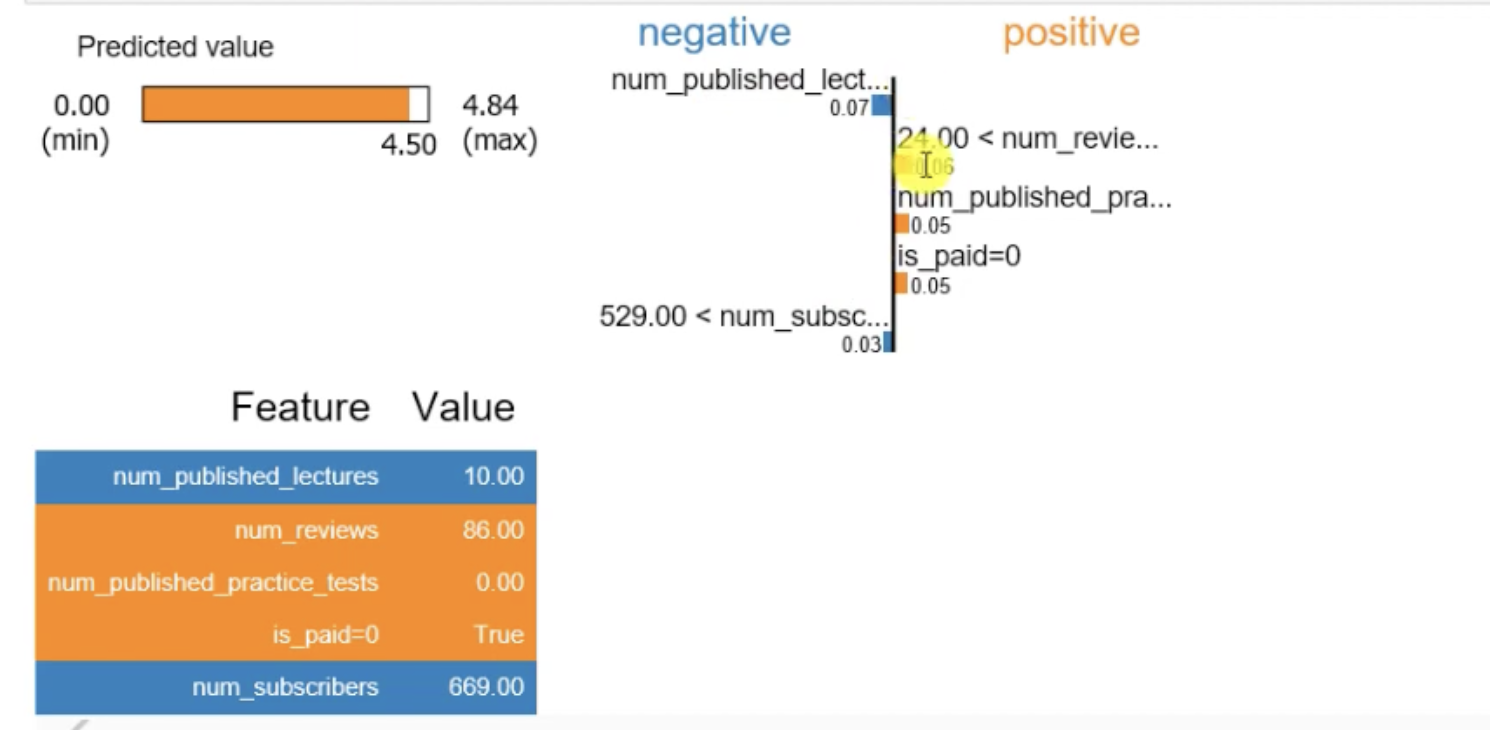

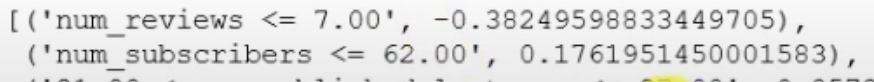

* A la izquierda, se ve el valor predecido, que en nuestro caso se verá distinto al hacer modelos de clasificación.
* A la derecha arriba, se ve el efecto de las features: puede ser negativo y positivo.
* También haciendo **exp.as_list()** podemos ver para todas las features con efecto negativo los valores que debieron haber tenido para causar un impacto positivo en la predicción. Esto es útil porque así sabemos si esos valores fueron más altos o más bajos de lo esperado.
En el ejemplo mostrado, **num_reviews** tuvo un efecto negativo, ya que su valor fue <= 7.00. Por lo tanto, es posible concluir que se esperaba un valor más alto en aquella feature.


## Decision Tree

In [ ]:
# creamos un explainer que usaremos para todos los modelos, basado en nuestros datos
from lime import lime_tabular
import numpy as np

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
                                                            mode='classification',
                                                            feature_names = X_train.columns,
                                                            categorical_features=y_train)

### Ironman

In [ ]:
dt_exp = explainer.explain_instance(data_row=X_test.iloc[0],
                                                  predict_fn=tree.predict_proba)
dt_exp.show_in_notebook(show_table=True)
print()
dt_exp.as_list()

En este ejemplo, el modelo se equivocó. Predijo Thor para una instancia de Ironman.

### Hulk

In [ ]:
dt_exp = explainer.explain_instance(data_row=X_test.iloc[1],
                                                  predict_fn=tree.predict_proba)
dt_exp.show_in_notebook(show_table=True)
print()
dt_exp.as_list()

Un ejemplo de un acierto exitoso de Hulk.

### Captain America

In [ ]:
dt_exp = explainer.explain_instance(data_row=X_test.iloc[7],
                                                  predict_fn=tree.predict_proba)
dt_exp.show_in_notebook(show_table=True)
print()
dt_exp.as_list()

Ejemplo de un acierto del modelo para esta clase.

### Thor

In [ ]:
dt_exp = explainer.explain_instance(data_row=X_test.iloc[10],
                                                  predict_fn=tree.predict_proba)
dt_exp.show_in_notebook(show_table=True)
print()
dt_exp.as_list()

Aquí el modelo confundió a Thor por Hulk (3).

### Black Widow

In [ ]:
dt_exp = explainer.explain_instance(data_row=X_test.iloc[20],
                                                  predict_fn=tree.predict_proba)
dt_exp.show_in_notebook(show_table=True)
print()
dt_exp.as_list()

Ejemplo de acierto exitoso de Black Widow

### Hawkeye

In [ ]:
dt_exp = explainer.explain_instance(data_row=X_test.iloc[27],
                                                  predict_fn=tree.predict_proba)
dt_exp.show_in_notebook(show_table=True)
print()
dt_exp.as_list()

Aqui el modelo confundió a Hawkeye por Black Widow (0).

### Nick Fury

In [ ]:
dt_exp = explainer.explain_instance(data_row=X_test.iloc[109],
                                                  predict_fn=tree.predict_proba)
dt_exp.show_in_notebook(show_table=True)
print()
dt_exp.as_list()

El modelo confundió a Nick Fury por Ironman (4).

## Random Forest

### Ironman

In [ ]:
forest_exp = explainer.explain_instance(data_row=X_test.iloc[0],
                                                  predict_fn=forest.predict_proba)
forest_exp.show_in_notebook(show_table=True)
print()
forest_exp.as_list()

Un ejemplo de acierto exitoso de Ironman por parte de Random Forest.

### Hulk

In [ ]:
forest_exp = explainer.explain_instance(data_row=X_test.iloc[1],
                                                  predict_fn=forest.predict_proba)
forest_exp.show_in_notebook(show_table=True)
print()
forest_exp.as_list()

Un ejemplo de acierto exitoso de Hulk por parte de Random Forest.

### Captain America

In [ ]:
forest_exp = explainer.explain_instance(data_row=X_test.iloc[7],
                                                  predict_fn=forest.predict_proba)
forest_exp.show_in_notebook(show_table=True)
print()
forest_exp.as_list()

Un ejemplo de acierto exitoso de Captain America por parte de Random Forest.

### Thor

In [ ]:
forest_exp = explainer.explain_instance(data_row=X_test.iloc[10],
                                                  predict_fn=forest.predict_proba)
forest_exp.show_in_notebook(show_table=True)
print()
forest_exp.as_list()

En este ejemplo, el modelo predijo Ironman para una instancia de Thor.

### Black Widow

In [ ]:
forest_exp = explainer.explain_instance(data_row=X_test.iloc[20],
                                                  predict_fn=forest.predict_proba)
forest_exp.show_in_notebook(show_table=True)
print()
forest_exp.as_list()

Un acierto exitoso de una instancia de Black Widow.

### Hawkeye

In [ ]:
forest_exp = explainer.explain_instance(data_row=X_test.iloc[27],
                                                  predict_fn=forest.predict_proba)
forest_exp.show_in_notebook(show_table=True)
print()
forest_exp.as_list()

En este ejemplo, el modelo se equivocó al predecir una instancia de Hawkeye como Black Widow. Podemos ver que no estuvo ni cerca de acertar.

### Nick Fury

In [ ]:
forest_exp = explainer.explain_instance(data_row=X_test.iloc[109],
                                                  predict_fn=forest.predict_proba)
forest_exp.show_in_notebook(show_table=True)
print()
forest_exp.as_list()

En este ejemplo, el modelo se equivocó al predecir una instancia de Nick Fury como Ironman. Podemos ver que no estuvo ni cerca de acertar.

## Gradient Boosting

### Ironman

In [ ]:
gradient_exp = explainer.explain_instance(data_row=X_test.iloc[0],
                                                  predict_fn=gboost.predict_proba)
gradient_exp.show_in_notebook(show_table=True)
print()
gradient_exp.as_list()

Un acierto exitoso de una instancia de Ironman por parte de Gradient Boosting.

### Hulk

In [ ]:
gradient_exp = explainer.explain_instance(data_row=X_test.iloc[1],
                                                  predict_fn=gboost.predict_proba)
gradient_exp.show_in_notebook(show_table=True)
print()
gradient_exp.as_list()

Un acierto exitoso de una instancia de Hulk, pero bastante cerca de confundirse con Captain America.

### Captain America

In [ ]:
gradient_exp = explainer.explain_instance(data_row=X_test.iloc[7],
                                                  predict_fn=gboost.predict_proba)
gradient_exp.show_in_notebook(show_table=True)
print()
gradient_exp.as_list()

Un acierto exitoso de una instancia de Capitan America.

### Thor

In [ ]:
gradient_exp = explainer.explain_instance(data_row=X_test.iloc[10],
                                                  predict_fn=gboost.predict_proba)
gradient_exp.show_in_notebook(show_table=True)
print()
gradient_exp.as_list()

Aqui el modelo se equivocó, al predecir Ironman para una instancia de Thor.

### Black Widow

In [ ]:
gradient_exp = explainer.explain_instance(data_row=X_test.iloc[20],
                                                  predict_fn=gboost.predict_proba)
gradient_exp.show_in_notebook(show_table=True)
print()
gradient_exp.as_list()

Un sólido acierto de una instancia de Black Widow.

### Hawkeye

In [ ]:
gradient_exp = explainer.explain_instance(data_row=X_test.iloc[27],
                                                  predict_fn=gboost.predict_proba)
gradient_exp.show_in_notebook(show_table=True)
print()
gradient_exp.as_list()

Aqui el modelo estaba totalmente convencido de encontrarse con una instancia de Black Widow, cuando en realidad era de Hawkeye.

### Nick Fury

In [ ]:
gradient_exp = explainer.explain_instance(data_row=X_test.iloc[109],
                                                  predict_fn=gboost.predict_proba)
gradient_exp.show_in_notebook(show_table=True)
print()
gradient_exp.as_list()

Un error intentando predecir una instancia de Nick Fury. Podemos ver que no estuvo ni cerca de acertar.

## KNN

### Ironman

In [ ]:
knn_exp = explainer.explain_instance(data_row=X_test.iloc[0],
                                                  predict_fn=knn.predict_proba)
knn_exp.show_in_notebook(show_table=True)
print()
knn_exp.as_list()

Un acierto exitoso de una instancia de Ironman.

### Hulk

In [ ]:
knn_exp = explainer.explain_instance(data_row=X_test.iloc[1],
                                                  predict_fn=knn.predict_proba)
knn_exp.show_in_notebook(show_table=True)
print()
knn_exp.as_list()

Un acierto exitoso de una instancia de Hulk.

### Captain America

In [ ]:
knn_exp = explainer.explain_instance(data_row=X_test.iloc[7],
                                                  predict_fn=knn.predict_proba)
knn_exp.show_in_notebook(show_table=True)
print()
knn_exp.as_list()

Acá el modelo no acertó a una instancia de Capitan America, lo confundió con Thor.

### Thor

In [ ]:
knn_exp = explainer.explain_instance(data_row=X_test.iloc[10],
                                                  predict_fn=knn.predict_proba)
knn_exp.show_in_notebook(show_table=True)
print()
knn_exp.as_list()

El modelo se equivocó al predecir una instancia de Thor, confundiendose con Ironman.

### Black Widow

In [ ]:
knn_exp = explainer.explain_instance(data_row=X_test.iloc[20],
                                                  predict_fn=knn.predict_proba)
knn_exp.show_in_notebook(show_table=True)
print()
knn_exp.as_list()

Acierto exitoso de una instancia de Black Widow.

### Hawkeye

In [ ]:
knn_exp = explainer.explain_instance(data_row=X_test.iloc[27],
                                                  predict_fn=knn.predict_proba)
knn_exp.show_in_notebook(show_table=True)
print()
knn_exp.as_list()

El modelo no estuvo ni cerca en este caso de predecir a la instancia de Hawkeye.

### Nick Fury

In [ ]:
knn_exp = explainer.explain_instance(data_row=X_test.iloc[109],
                                                  predict_fn=knn.predict_proba)
knn_exp.show_in_notebook(show_table=True)
print()
knn_exp.as_list()

El modelo no estuvo ni cerca en este caso de predecir a la instancia de Nick Fury.

## SVM

### Ironman

In [ ]:
# Definimos una función de predicción que convierte los valores de decisión en probabilidades.
def predict_fn(X):
    decision_values = svm_model.decision_function(X)
    probabilities = (decision_values - decision_values.min()) / (decision_values.max() - decision_values.min())
    return probabilities

In [ ]:
svm_exp = explainer.explain_instance(data_row=X_test.iloc[0],
                                     predict_fn=predict_fn)
svm_exp.show_in_notebook(show_table=True)
print()
svm_exp.as_list()

El modelo predijo Captain America para una instancia de Ironman.

### Hulk

In [ ]:
svm_exp = explainer.explain_instance(data_row=X_test.iloc[1],
                                     predict_fn=predict_fn)
svm_exp.show_in_notebook(show_table=True)
print()
svm_exp.as_list()

Un ejemplo de una predicción acertada de una instancia de Hulk.

### Captain America

In [ ]:
svm_exp = explainer.explain_instance(data_row=X_test.iloc[7],
                                     predict_fn=predict_fn)
svm_exp.show_in_notebook(show_table=True)
print()
svm_exp.as_list()

Un ejemplo de una predicción acertada de una instancia de Captain America.

### Thor

In [ ]:
svm_exp = explainer.explain_instance(data_row=X_test.iloc[10],
                                     predict_fn=predict_fn)
svm_exp.show_in_notebook(show_table=True)
print()
svm_exp.as_list()

En esta instancia, el modelo se equivocó al confundir un dato de Thor por uno de Ironman. No estuvo muy cerca de acertar.

### Black Widow

In [ ]:
svm_exp = explainer.explain_instance(data_row=X_test.iloc[20],
                                     predict_fn=predict_fn)
svm_exp.show_in_notebook(show_table=True)
print()
svm_exp.as_list()

El modelo acertó a esta instancia de Black Widow.

### Hawkeye

In [ ]:
svm_exp = explainer.explain_instance(data_row=X_test.iloc[27],
                                     predict_fn=predict_fn)
svm_exp.show_in_notebook(show_table=True)
print()
svm_exp.as_list()

El modelo no estuvo ni cerca de acertar esta instancia de Hawkeye. Predijo finalmente Black Widow.

### Nick Fury

In [ ]:
svm_exp = explainer.explain_instance(data_row=X_test.iloc[109],
                                     predict_fn=predict_fn)
svm_exp.show_in_notebook(show_table=True)
print()
svm_exp.as_list()

El modelo no estuvo cerca de predecir correctamente esta instancia de Hawkeye. Terminó optando por Hulk.

## Conclusiones LIME

Podemos ver que features como two-axis-proportion y mouth_width_place tuvieron efectos positivos para la gran mayoría de clases en todos los modelos realizados. Es posible decir que esas features fueron valiosas y efectivas.

Sin embargo, features como eyebrow_height y orbicular en la mayoría de casos tuvieron un impacto negativo en la predicción de los distintos modelos para las instancias estudiadas. Por ende, se concluye que aquellas features no fueron muy útiles para los modelos.

Para Ironman, la clase mas relevante debido a que es la que más datos de entrenamiento tuvo y a la vez que fue la con mejor rendimiento en todos los modelos, podemos ver el impacto de las diversas features:

| Feature            | # de impactos positivos  | # de impactos negativos |
|-------------------- |----------               |----------|
| mouth_width_place   | 4                 | 1   |
| eye_space           | 4                 | 1   |
| eye_nose_width      | 4                  | 1  |
| nose_length         | 1                 | 4   |
| eyebrow_height      | 2                  | 3  |
| sup_lip             | 3                | 2  |
| eyebrow_distance    | 3                 | 2  |
| two_axis_proportion | 4                | 1  |
| lips_relation       | 1                  | 4  |
| orbicular           | 0                  | 5  |

Podemos claramente ver cuales son las features que tuvieron más impactos positivos, como también las que tuvieron más impactos negativos.

